# Библиотеки

In [1]:
import pandas as pd
import re
import string
import pymorphy2
from nltk.corpus import stopwords
import os

import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams
%matplotlib inline
import cufflinks
cufflinks.go_offline()

import plotly.offline
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import spatial
import collections
import pymorphy2
import gensim

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



# Обработка текстов

In [2]:
# Создаём морфологический анализатор и расширяем список всего, что нужно отбросить
morph = pymorphy2.MorphAnalyzer()
stopwords_list = stopwords.words('russian')
stopwords_list.extend(['куплет', 'это', 'припев', 'аутро', 'предприпев', 'lyrics', 'интро', 'бридж', 'скит'])
string.punctuation += '—'

In [3]:
# Указываем путь к файлам с текстами песен
path ="C:/Users/malya/Desktop/Datasets/NLP/MorgensternAlbum"

# Длины конечной папки и расширения файла
len_folder = len('MorgensternAlbum')
len_extension = len('.txt')

filelist = []
songs = []
songs_name_list = []

# Запись путей к файлам
for root, dirs, files in os.walk(path):
    for file in files:
        filelist.append(os.path.join(root,file))

# Запись названий песен
for name in filelist:
    name_ind = name.find('MorgensternAlbum')+len_folder+1
    song_name = name[53:len(name)-len_extension]
    songs_name_list.append(song_name)

In [4]:
songs_name_list

['ARISTOCRAT',
 'DINERO',
 'FATHER’S_TANK',
 'GTA',
 'HUBLOT',
 'I_WILL_LEAVE_SOMETIME',
 'MANIA',
 'NOMINALO',
 'OLALA',
 'ON_PILLS',
 'PULL_UP',
 'WHEN_WE_SOBER_UP']

In [5]:
def read_song(filename):
    """
    Чтение песни из файла и удаление переносов строк
    """
    f = open(f'C:\\Users\\malya\\Desktop\\Datasets\\NLP\\MorgensternAlbum\\{filename}.txt', encoding='utf-8').read()
    f = f.replace('\n', ' ')
    return f

def clean_string(text):
    """
    Очищение текста от ненужных символов и слов
    """
    text = re.split(' |:|\.|\(|\)|,|"|;|/|\n|\t|-|\?|\[|\]|!', text)
    text = ' '.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

def string_to_normal_form(string):
    """
    Приведение слов к нормальной форме
    """
    string_lst = string.split()
    for i in range(len(string_lst)):
        string_lst[i] = morph.parse(string_lst[i])[0].normal_form
    string = ' '.join(string_lst)
    return string

In [6]:
# Проходим по каждой песне и читаем файл с соответствующим названием:
text_list = []
for name in songs_name_list:
    text = string_to_normal_form(clean_string(read_song(name)))
    text_list.append(text)

In [7]:
# создаем итоговый датасет c названием песен, текстом и длительностью
df = pd.DataFrame()
df['song_name'] = songs_name_list
df['text'] = text_list
df['time(sec)'] = [127, 158, 127, 127, 123, 160, 120, 132, 142, 146, 132, 169]
df.to_csv('borderline.csv', index=False)

# EDA

In [8]:
# Читаем csv-файл и устанавливаем конфигурации
nltk.download('punkt')
data = pd.read_csv('borderline.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
data.head()

,song_name,text,time(sec)
0,ARISTOCRAT,миледи просить коль сосать делать культурно ча...,127
1,DINERO,эй эй говорить мой песня деньга просто поить л...,158
2,FATHER’S_TANK,чёрный папин танк хей папин танк папин танк па...,127
3,GTA,здравствуйте просить прощение morgenshtern гов...,127
4,HUBLOT,hola сеньор слава сделать рука hublot ум бабло...,123


c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

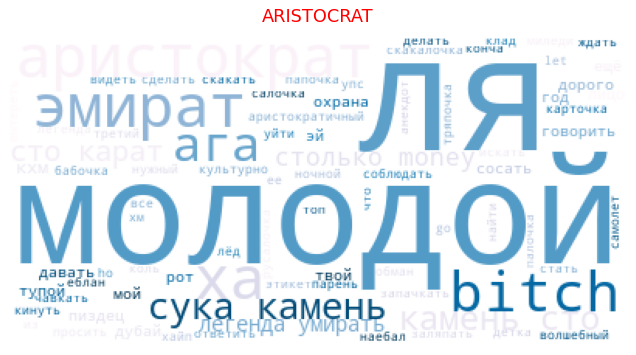

<Figure size 432x288 with 0 Axes>

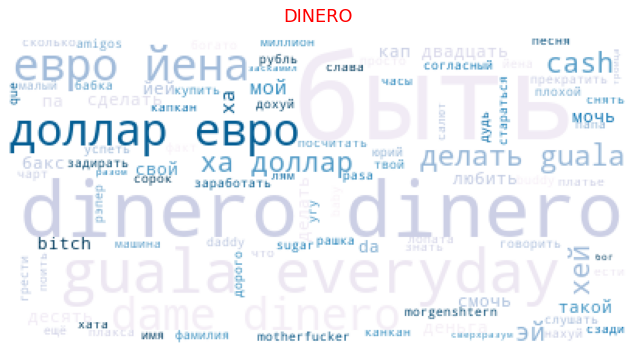

<Figure size 432x288 with 0 Axes>

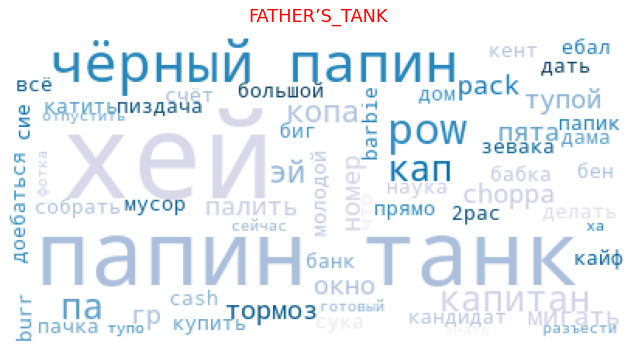

<Figure size 432x288 with 0 Axes>

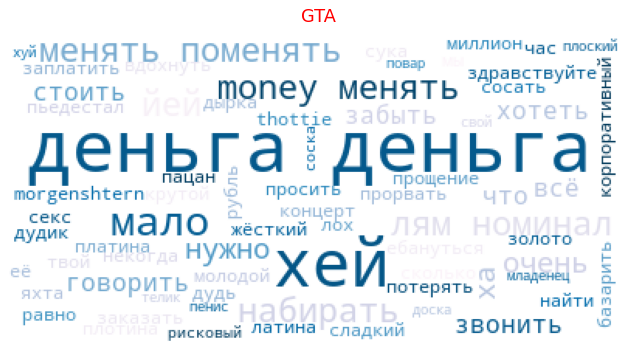

<Figure size 432x288 with 0 Axes>

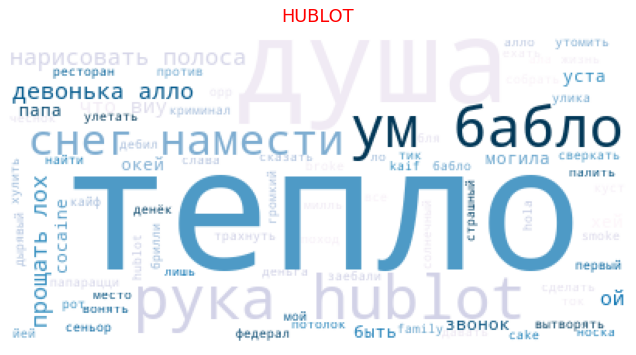

<Figure size 432x288 with 0 Axes>

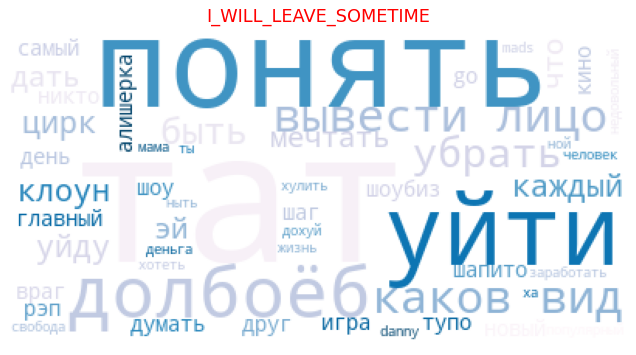

<Figure size 432x288 with 0 Axes>

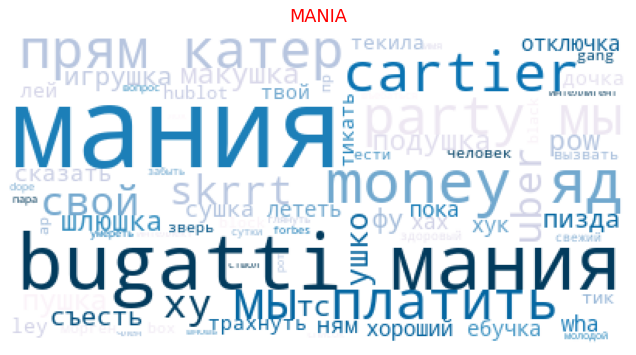

<Figure size 432x288 with 0 Axes>

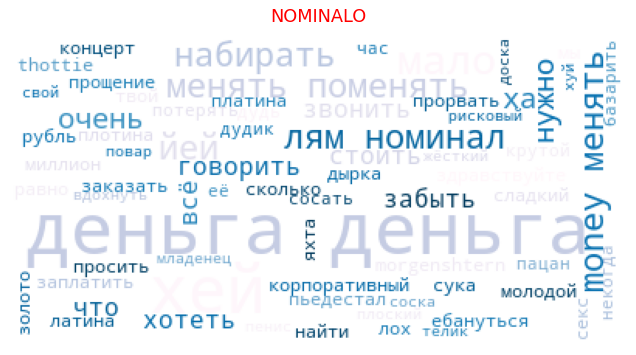

<Figure size 432x288 with 0 Axes>

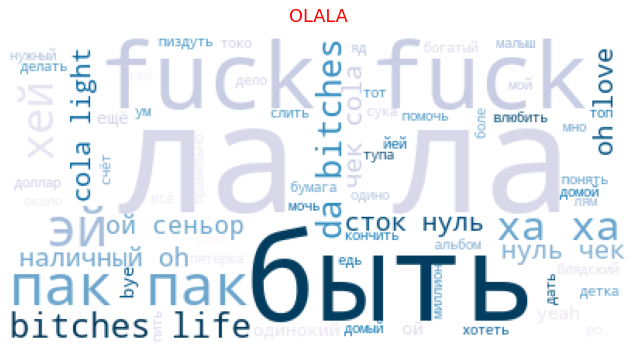

<Figure size 432x288 with 0 Axes>

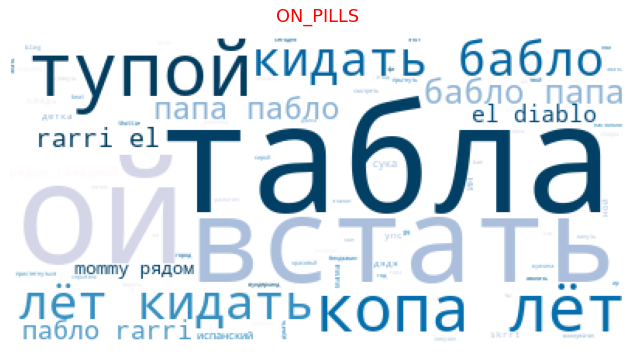

<Figure size 432x288 with 0 Axes>

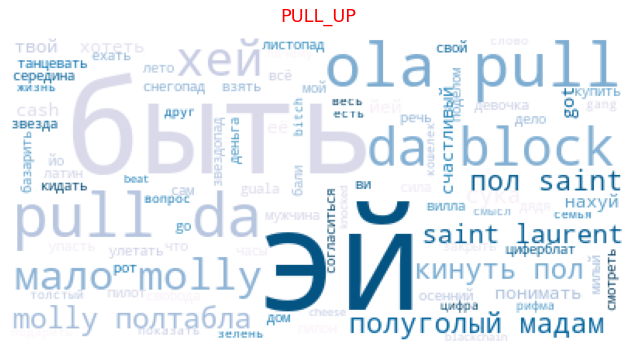

<Figure size 432x288 with 0 Axes>

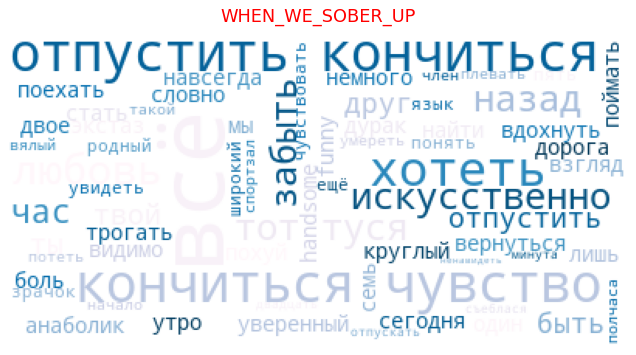

In [10]:
# Построение WordCloud
i = 1
for name, text in zip(data.song_name, data.text):
    tokens = word_tokenize(text)
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10).generate(text_raw)
    fig = plt.figure()
    plt.figure(figsize=[10, 10], dpi=80)
    plt.title(name)
    #plt.tick_params(labelsize=30)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name, fontdict={'fontsize':16,'color':'red'}, y=1.03)
    plt.tick_params(labelsize=10)
    i += 1

In [11]:
# Посчитаем число слов в каждой песне, число уникальных слов и процентное соотношение
songs = []
total = []
uniq = []
percent = []

for song, text in zip(data.song_name, data.text):
    songs.append(song)
    total.append(len(text.split()))
    uniq.append(len(set(text.split())))
    percent.append(round(len(set(text.split())) / len(text.split()), 2) * 100)

In [12]:
# Итоговый датасет с названиями песен и статистикой по словам
data_words = pd.DataFrame()
data_words['song'] = songs
data_words['total words'] = total
data_words['uniq words'] = uniq
data_words['percent'] = percent
data_words['time'] = data['time(sec)']
data_words['words per minute'] = round(total / (data['time(sec)'] // 60))
data_words

,song,total words,uniq words,percent,time,words per minute
0,ARISTOCRAT,161,87,54.0,127,80.0
1,DINERO,234,98,42.0,158,117.0
2,FATHER’S_TANK,223,66,30.0,127,112.0
3,GTA,160,74,46.0,127,80.0
4,HUBLOT,144,84,58.0,123,72.0
5,I_WILL_LEAVE_SOMETIME,107,54,50.0,160,54.0
6,MANIA,136,79,58.0,120,68.0
7,NOMINALO,160,74,46.0,132,80.0
8,OLALA,238,73,31.0,142,119.0
9,ON_PILLS,152,81,53.0,146,76.0


In [13]:
# Диаграмма для числа слов в песне и числа слов в минуту
fig = go.Figure(data=[
    go.Bar(name='Всего слов',
           text=data_words['total words'],
           textposition='auto',
           x=data_words.song,
           y=data_words['total words'],
           textfont_color='black',
           #marker_color=colors_1,
           marker=dict(line=dict(width=2)),),
    
    go.Bar(name='Уникальных слов',
           text=data_words['uniq words'].astype(str) + '<br>'+ data_words.percent.astype(int).astype(str) + '%' ,
           textposition='inside',
           x=data_words.song,
           y=data_words['uniq words'],
           textfont_color='black',
           #marker_color=colors_2,
           marker=dict(line=dict(width=2)),),
])

fig.update_layout(barmode='group')
fig.update_layout(height=600, 
                  width=1000, 
                  title_text="Соотношение числа уникальных слов к общему количеству", 
                  template='plotly_white')
fig.show()

In [14]:
# Диаграмма числа уникальных слов к общему количеству
fig = go.Figure(data=[
    go.Bar(name='Длина трека, мин.',
           text=round(data_words['time'] / 60, 1),
           textposition='auto',
           x=data_words.song,
           y=-data_words['time'] // 60,
           #marker_color=colors_1,
           textfont_color='black',
           marker=dict(line=dict(width=2)),
          ),
    go.Bar(name='Слов в минуту',
           text=data_words['words per minute'],
           textposition='auto',
           x=data_words.song,
           y=data_words['words per minute'],
           #marker_color=colors_2,
           textfont_color='black',
           marker=dict(line=dict(width=2)),
          ),
])

fig.update_layout(barmode='overlay')
fig.update_layout(height=600, 
                  width=1000, 
                  title_text="Длина трека и число слов в минуту", 
                  template='plotly_white')

fig.show()

# Modeling

In [15]:
# Экземпляр модели word2vec
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [16]:
def get_vector(word_list):
    """
    Распознавание части речи для списка слов, получение и суммирование векторов
    """
    vector = 0
    for word in word_list:
        pos = morph.parse(word)[0].tag.POS
        if pos == 'INFN':
            pos = 'VERB'
        if pos in ['ADJF', 'PRCL', 'ADVB', 'NPRO']:
            pos = 'NOUN'
        if word and pos:
            try:
                word_pos = word + '_' + pos
                this_vector = model.word_vec(word_pos)
                vector += this_vector
            except KeyError:
                continue
    return vector

In [17]:
# Для каждой песни находим вектор и собираем соответствующий столбец в DataFrame
vec_list = []
for word in data['text']:
    vec_list.append(get_vector(word.split()))
data['vector'] = vec_list

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning:

Call to deprecated `word_vec` (Use get_vector instead).



In [18]:
data.head()

,song_name,text,time(sec),vector
0,ARISTOCRAT,миледи просить коль сосать делать культурно ча...,127,"[27.10342, -1.7059939, -7.267994, 21.552752, 1..."
1,DINERO,эй эй говорить мой песня деньга просто поить л...,158,"[58.62076, -31.52528, -45.120758, 0.35795212, ..."
2,FATHER’S_TANK,чёрный папин танк хей папин танк папин танк па...,127,"[123.011856, 11.6289835, 11.651234, -32.484463..."
3,GTA,здравствуйте просить прощение morgenshtern гов...,127,"[79.122116, 0.9844309, 4.0837064, 72.14807, -5..."
4,HUBLOT,hola сеньор слава сделать рука hublot ум бабло...,123,"[20.573738, -11.492083, 12.8027, 1.2067536, 29..."


In [19]:
# Cравнение векторов между собой через косинусную близость 
# Выделение песен с косинусной метрикой выше 0,5
similar = dict()
result = []
for song_1, vector_1 in zip(data.song_name, data.vector):
    sub_list = []
    for song_2, vector_2 in zip(data.song_name.iloc[::-1], data.vector.iloc[::-1]):
        res = 1 - spatial.distance.cosine(vector_1, vector_2)
        if res > 0.5 and song_1 != song_2 and (song_1 + ' / ' + song_2 not in similar.keys() and song_2 + ' / ' + song_1 not in similar.keys()):
            similar[song_1 + ' / ' + song_2] = round(res, 2)
        sub_list.append(round(res, 2))
    result.append(sub_list)

In [20]:
# Отдельный датафрейм для похожих треков
df_top_sim = pd.DataFrame()
df_top_sim['name'] = list(similar.keys())
df_top_sim['value'] = list(similar.values())
df_top_sim.sort_values(by='value', ascending=False)

,name,value
3,GTA / NOMINALO,1.00
2,DINERO / OLALA,0.63
6,ON_PILLS / PULL_UP,0.62
4,HUBLOT / PULL_UP,0.56
5,OLALA / PULL_UP,0.55
0,ARISTOCRAT / PULL_UP,0.52
1,ARISTOCRAT / ON_PILLS,0.52


In [24]:
# Диаграмма для похожих треков

fig = go.Figure([go.Bar(x=df_top_sim['name'],
                        y=df_top_sim['value'],
                        text=df_top_sim['value'],
                        textfont_color='white',
                        textposition='auto')])

fig.update_layout(height=600, 
                  width=1000, 
                  title_text="Топ похожих песен", 
                  template='plotly_white')

fig.show()

In [22]:
def get_word_from_tlist(lst):
    """
    Cложение векторов песен для получения самых близких по слов
    """
    for word in lst:
        word = word[0].split('_')[0]
        print(word, end=' ')

vec_sum = 0
for vec in data.vector:
    vec_sum += vec
sim_word = model.similar_by_vector(vec_sum)
print('Описание альбома Моргенштерна в 10 словах: ')
get_word_from_tlist(sim_word)

Описание альбома Моргенштерна в 10 словах: 
деньга рублик понт бля хуе бакс говорить сволочь деньжище денежка 

In [23]:
# Корреляция (косинусная мера) для всех треков
font_colors = ['black']
x = list(data.song_name.iloc[::-1])
y = list(data.song_name)
#plt.figure(figsize=[15, 15], dpi=100)
fig = ff.create_annotated_heatmap(result, x=x, y=y, font_colors=font_colors)
fig.show()